# Hotel booking cancellation prediction

Can we predict cancellation before it actually happens?

For that, I will be leveraging the guest data and booking patterns to devise a strategy that will be helpful for Hotel Revenue management using Data Science and Machine learning.

If the hotel staff is able to predict cancellation so what all they can do?

Options:

1. If the customer is not fairly engaged with the booking then they can retain the customer by giving discounts or increasing the time the customer can cancel the booking without paying any upfront charges.
2. Anything that entices the customer not to go away to the competitor.
3. If customer booking is fairly engaged and there is very less chance that (s)he will cancel the booking then the hotel staff don't have to infer more cost by giving discounts etc.

Simple note: I am giving them the way to cherry-pick. So out of all the bookings out there use my model to cherry-pick to call up the customers.

## Which features or feature combinations hint that the booking is likely to be cancelled? Building a classifier and/or correlation analysis might help us with this.

I have tried to explain the features and later their combination to predict the likelihood of cancellation

# Importing all the required libraries

In [198]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="white", color_codes=True)

In the  data, there are two kinds of Hotel:
1. Resort hotel
2. City Hotel

In [199]:
df = pd.read_csv("hotel_booking.csv")
#df.shape
df.head(100000)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,City Hotel,0,184,2016,October,43,17,1,3,2,...,Transient,128.70,0,2,Check-Out,2016-10-21,Amanda Bowman,Amanda.B@yandex.com,488-121-7719,************8474
99996,City Hotel,0,59,2016,October,43,17,1,3,1,...,Transient,117.00,0,2,Check-Out,2016-10-21,Alyssa Hill,AHill@comcast.net,739-281-1490,************1551
99997,City Hotel,0,256,2016,October,43,16,2,3,2,...,Transient-Party,100.75,0,0,Check-Out,2016-10-21,Heather Miller,HMiller32@aol.com,760-394-6171,************4990
99998,City Hotel,0,256,2016,October,43,16,2,3,2,...,Transient-Party,100.75,0,0,Check-Out,2016-10-21,Jonathan Oconnor,Jonathan_O@aol.com,474-003-4234,************4606


## Character variables in the data

In [200]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

## Below 119390 are the bookings and 36 are the feature columns

In [201]:
df.shape

(119390, 36)

## We can see the number of cancelled bookings.

0 represents --> Not cancelled booking

1 represents --> Cancelled booking

As you can see the imbalance in the cancelled booking vs not cancelled booking values. But there won't be a problem as it is very heavily loaded on the event side

In [202]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [203]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

Below I calculated the cancellation rate

In [204]:
df['is_canceled'].mean()

0.37041628277075134

In [205]:
df['lead_time']

0         342
1         737
2           7
3          13
4          14
         ... 
119385     23
119386    102
119387     34
119388    109
119389    205
Name: lead_time, Length: 119390, dtype: int64

In [206]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

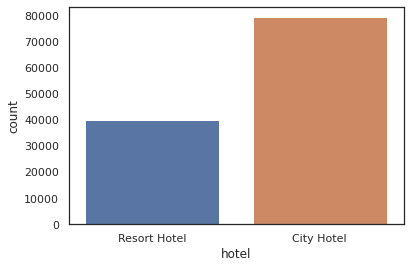

In [207]:
sns.countplot(x='hotel', data=df)
plt.show()

## Lets check the missing values

In [208]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [209]:
nan_replacements = {"children": 0, "country": "Unknown", "agent": 0, "company": 0}

df = df.fillna(nan_replacements)

df["meal"].replace("Undefined", "SC", inplace= True)

In [210]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

Hotel- It doesn't matter which type of hotel they make a reservation, the main objective is to see if they make any type of reservation at all or not an agent - The agent that got the reservation for us won't matter company - Same logic goes for the company as for the agent reservation_status_date - We have other features(like: arrival_date_week_number, arrival_date_day_of_month etc) that give us the same information

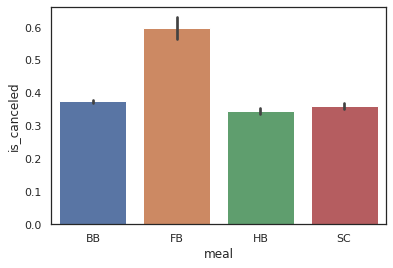

In [211]:
from numpy import mean
ax = sns.barplot(x="meal", y="is_canceled", data=df, estimator=mean)

## Why I dropped 'country' variable??

If the 'country' column becomes part of my model it will make the model look good/ more accurate. The only problem is when you run the model the customer coming from that specific country will have a lower/higher score for cancellation. So whatever strategy the hotel staff have decided for their customer based on these probabilities then they will be forced to take those strategies every single time for the customer coming from that country. That is why we will not include a country column for our model.

In [212]:
df.groupby('country')['is_canceled'].mean() #Probability of cancellation from each country

country
ABW    0.000000
AGO    0.566298
AIA    0.000000
ALB    0.166667
AND    0.714286
         ...   
VGB    1.000000
VNM    0.250000
ZAF    0.387500
ZMB    0.500000
ZWE    0.500000
Name: is_canceled, Length: 178, dtype: float64

## Why I dropped 'is_repeated_guest' column?? 

As we can see below the event rate for repeated guests is a little less than 15%(which is very low) and 37% is the average event rate.
If we see the non-repeated guest is just 37-38%. So if the guest is non-repeated then there are not much likelihood/chances that s(he) will cancel the booking.
Hence there is not a lot of potentials to capture cancellation. There I dropped it

0--> Non-repeated guest

1--> Repeated guest

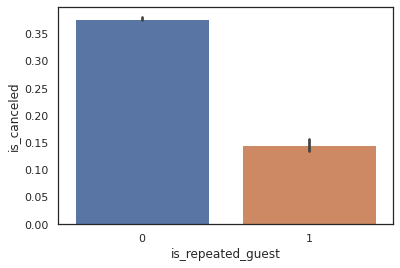

In [213]:
 from numpy import mean

 ax = sns.barplot(x="is_repeated_guest", y= "is_canceled", data=df, estimator=mean)

## Why I will be considering 'market_segment' as a variable?? 
Because we have significant chunk of observations. Hence it is a good discriminator

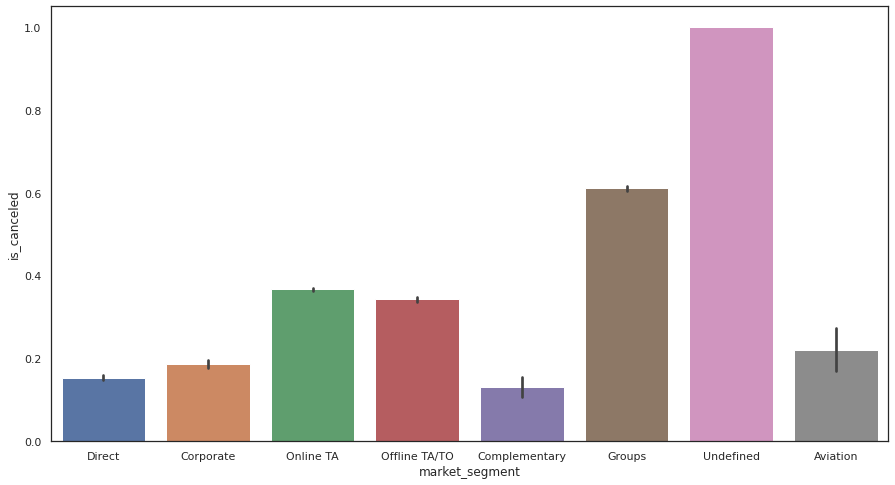

In [214]:
from numpy import mean

plt.figure(figsize = (15,8))
ax = sns.barplot(x="market_segment", y = "is_canceled", data=df, estimator=mean)

In [215]:
df.groupby('market_segment')['is_canceled'].mean()

market_segment
Aviation         0.219409
Complementary    0.130552
Corporate        0.187347
Direct           0.153419
Groups           0.610620
Offline TA/TO    0.343160
Online TA        0.367211
Undefined        1.000000
Name: is_canceled, dtype: float64

In [216]:
df.groupby('market_segment')['is_canceled'].count()

market_segment
Aviation           237
Complementary      743
Corporate         5295
Direct           12606
Groups           19811
Offline TA/TO    24219
Online TA        56477
Undefined            2
Name: is_canceled, dtype: int64

## Why i dropped 'arrival_date_month' variable??

Because as below you can see arrival_date_month is not a big discriminator as the values are very much close to each other like 0.33; 0.37; 0.41 etc

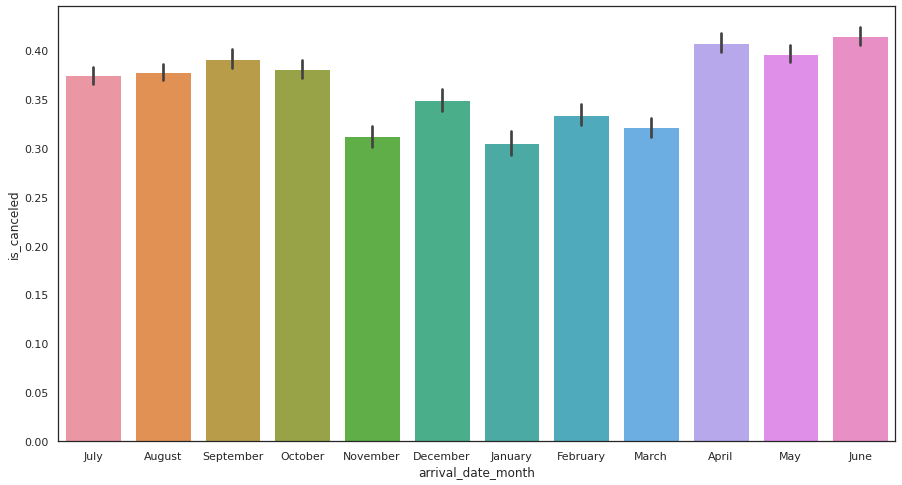

In [217]:
from numpy import mean
plt.figure(figsize = (15,8))
ax = sns.barplot(x="arrival_date_month", y = "is_canceled", data=df, estimator=mean)

In [218]:
df.groupby('arrival_date_month')['is_canceled'].mean()

arrival_date_month
April        0.407972
August       0.377531
December     0.349705
February     0.334160
January      0.304773
July         0.374536
June         0.414572
March        0.321523
May          0.396658
November     0.312334
October      0.380466
September    0.391702
Name: is_canceled, dtype: float64

## Why I picked up 'stays_in_weekend_nights' variable??
Because of the pocket in this variable that capture a good event rate

NB! It is good for decision tree and Random forest classifier


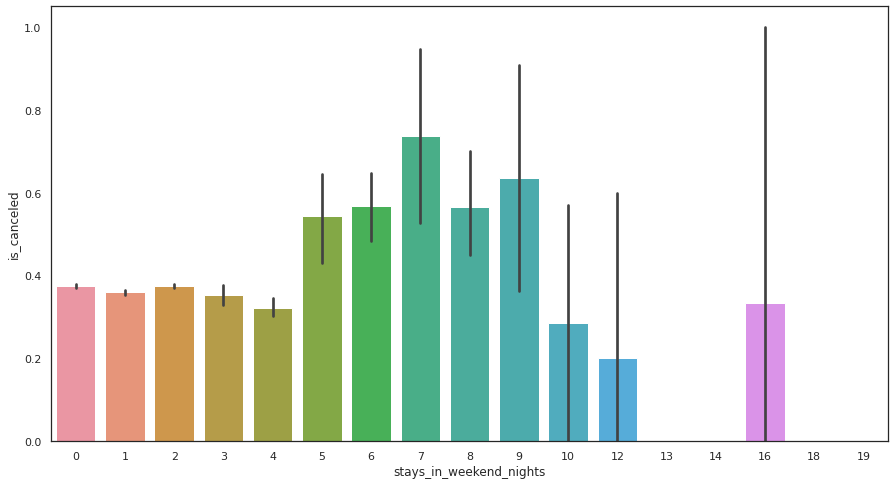

In [219]:
from numpy import mean
plt.figure(figsize = (15,8))
ax = sns.barplot(x="stays_in_weekend_nights", y = "is_canceled", data=df, estimator=mean)

In [220]:
df.groupby('stays_in_weekend_nights')['is_canceled'].mean()

stays_in_weekend_nights
0     0.375034
1     0.359401
2     0.374835
3     0.352661
4     0.322372
5     0.544304
6     0.568627
7     0.736842
8     0.566667
9     0.636364
10    0.285714
12    0.200000
13    0.000000
14    0.000000
16    0.333333
18    0.000000
19    0.000000
Name: is_canceled, dtype: float64

## Why I picked 'stays_in_week_nights' variable??

Below as you can see it has lots of values so visualization is not going to help me that much.

So I took 'stays_in_week_nights' as a variable and group them into 10 buckets of ranks and then value of 10 is given to the highest(10 is compose of top 10%)---> this step you can see with marking #*a*


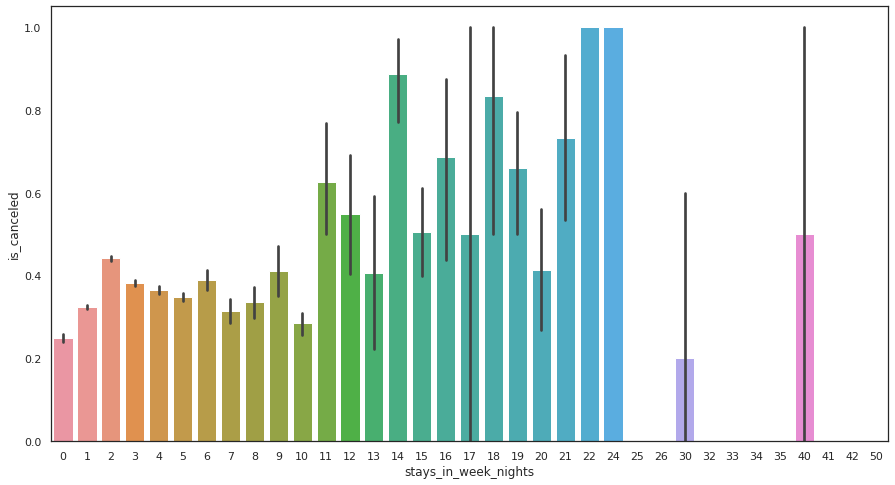

In [221]:
from numpy import mean
plt.figure(figsize = (15,8))
ax = sns.barplot(x="stays_in_week_nights", y = "is_canceled", data=df, estimator=mean)

In [222]:
df.groupby('stays_in_week_nights')['is_canceled'].mean()

stays_in_week_nights
0     0.250229
1     0.324348
2     0.441575
3     0.382110
4     0.365471
5     0.348560
6     0.388259
7     0.313897
8     0.335366
9     0.411255
10    0.284749
11    0.625000
12    0.547619
13    0.407407
14    0.885714
15    0.505882
16    0.687500
17    0.500000
18    0.833333
19    0.659091
20    0.414634
21    0.733333
22    1.000000
24    1.000000
25    0.000000
26    0.000000
30    0.200000
32    0.000000
33    0.000000
34    0.000000
35    0.000000
40    0.500000
41    0.000000
42    0.000000
50    0.000000
Name: is_canceled, dtype: float64

In [223]:
#a Here it is

## 'estimator=mean' --means-> means stands for the probability of cancellation when booking is made.


mean= Total number of cancellation / Number of bookings

qcut--> is a pandas package that manages the rank

method = 'first' --> means ascending order

codes+1 --> makes sure that every rank has the same number of observations. So that denominator will remain same so that they can be compared

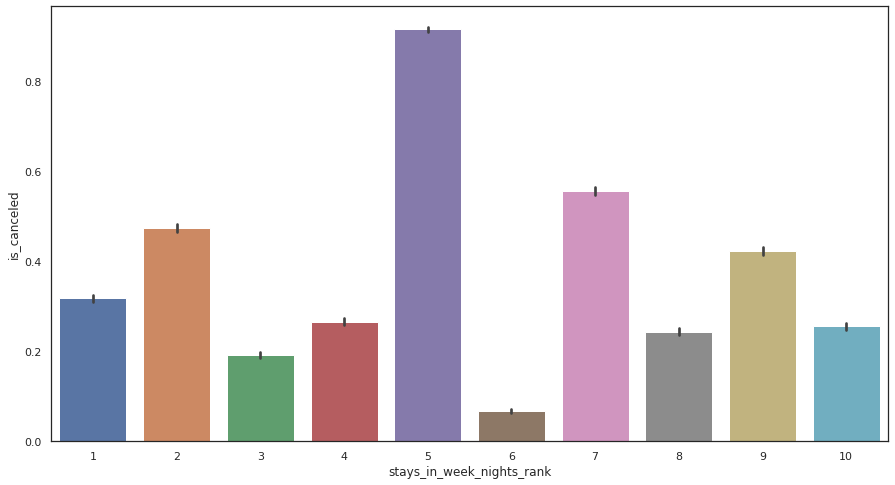

In [224]:
df['stays_in_week_nights_rank'] = pd.qcut(df['stays_in_week_nights'].rank(method='first').values, 10, duplicates='drop').codes+1

from numpy import mean
plt.figure(figsize = (15,8))
a=sns.barplot(x="stays_in_week_nights_rank", y="is_canceled", data=df, estimator=mean)

In [225]:
df.groupby('stays_in_week_nights_rank')['stays_in_week_nights'].min()

stays_in_week_nights_rank
1     0
2     1
3     1
4     1
5     2
6     2
7     2
8     3
9     4
10    5
Name: stays_in_week_nights, dtype: int64

In [226]:
df.groupby('stays_in_week_nights_rank')['is_canceled'].mean() ##

stays_in_week_nights_rank
1     0.317531
2     0.474244
3     0.191808
4     0.265098
5     0.914063
6     0.066756
7     0.554485
8     0.242734
9     0.422648
10    0.254795
Name: is_canceled, dtype: float64

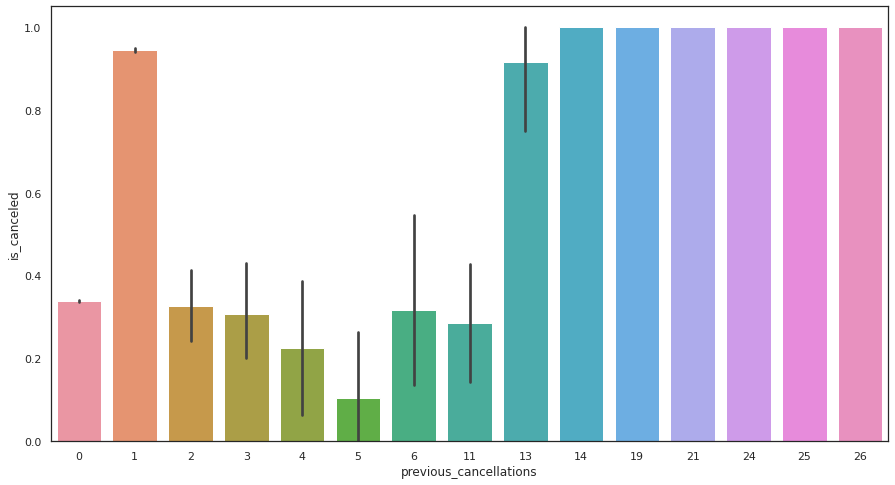

In [227]:
from numpy import mean
plt.figure(figsize = (15,8))
ax = sns.barplot(x="previous_cancellations", y = "is_canceled", data=df, estimator=mean)

In [228]:
df['previous_cancellations'].value_counts()

0     112906
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64

In [229]:
df.groupby('previous_cancellations')['is_canceled'].sum()

previous_cancellations
0     38282
1      5714
2        38
3        20
4         7
5         2
6         7
11       10
13       11
14       14
19       19
21        1
24       48
25       25
26       26
Name: is_canceled, dtype: int64

In [230]:
df.groupby('previous_cancellations')['is_canceled'].mean()

previous_cancellations
0     0.339061
1     0.944307
2     0.327586
3     0.307692
4     0.225806
5     0.105263
6     0.318182
11    0.285714
13    0.916667
14    1.000000
19    1.000000
21    1.000000
24    1.000000
25    1.000000
26    1.000000
Name: is_canceled, dtype: float64

## Why I have dropped 'booking_changes'?

As we can see below there is no variation as such and also in the middle & last its values are compeletly flat

In [231]:
df.groupby('booking_changes')['is_canceled'].mean()

booking_changes
0     0.408542
1     0.142272
2     0.201314
3     0.155340
4     0.178191
5     0.169492
6     0.285714
7     0.096774
8     0.235294
9     0.125000
10    0.166667
11    0.000000
12    0.000000
13    0.000000
14    0.200000
15    0.000000
16    0.500000
17    0.000000
18    0.000000
20    0.000000
21    0.000000
Name: is_canceled, dtype: float64

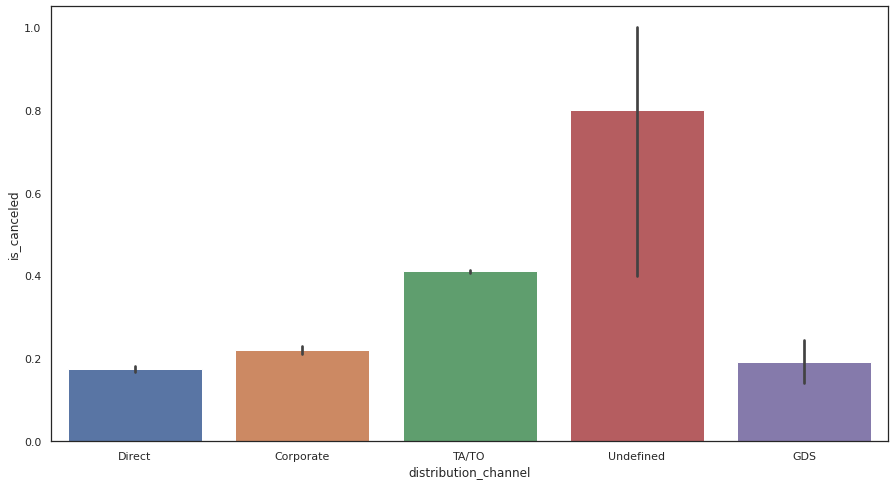

In [232]:
from numpy import mean
plt.figure(figsize = (15,8))
ax = sns.barplot(x="distribution_channel", y = "is_canceled", data=df, estimator=mean)

## Why I have dropped 'reserved_room_type'??

Because if we see 'P' there are only 12 resolutions(very few) hence it's not very trustworthy as its data volume capture is very low.

NB! We can use it but it will result in a very weak predictor

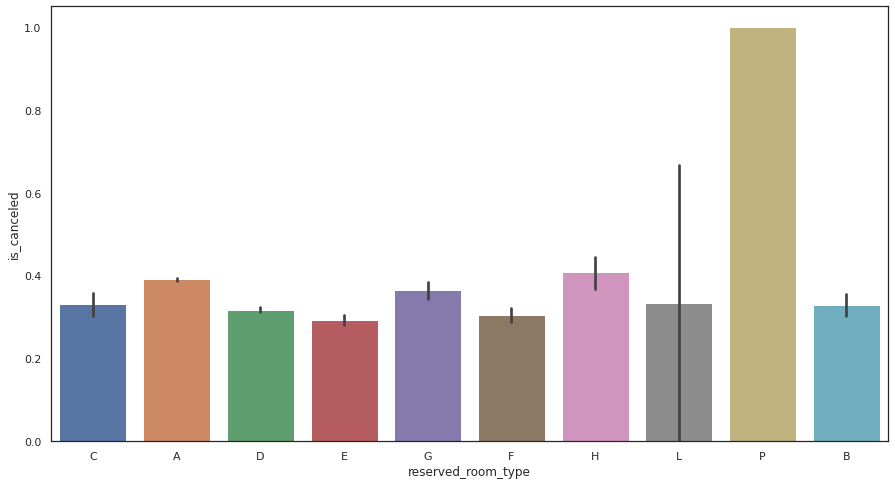

In [233]:
from numpy import mean
plt.figure(figsize = (15,8))
ax = sns.barplot(x="reserved_room_type", y = "is_canceled", data=df, estimator=mean)

In [234]:
df.groupby('reserved_room_type')['is_canceled'].count()

reserved_room_type
A    85994
B     1118
C      932
D    19201
E     6535
F     2897
G     2094
H      601
L        6
P       12
Name: is_canceled, dtype: int64

## Note:  
If we have a variable like 'P' which captures a category of 100% although there are few observations then it's better not to use that variable. If there is discrimination between the rest of the categories we could have used it by grouping it with something else. But as the above does not show that such discrimination and this one category 'P' which has very low data volume and has a high capture rate then there are chances that it will tend to be a very dominating variable.

That is why I dropped 'reserved_room_type'

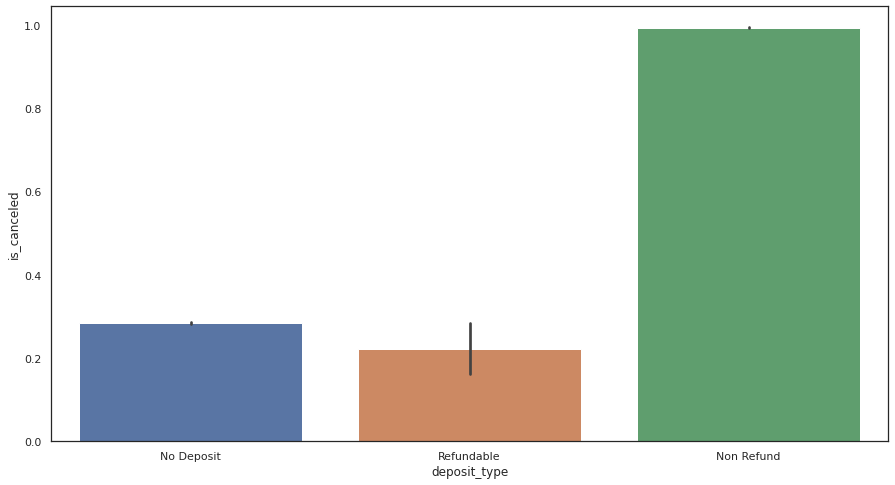

In [235]:
from numpy import mean
plt.figure(figsize = (15,8))
ax = sns.barplot(x="deposit_type", y = "is_canceled", data=df, estimator=mean)

In [236]:
df.groupby('deposit_type')['is_canceled'].mean()

deposit_type
No Deposit    0.283770
Non Refund    0.993624
Refundable    0.222222
Name: is_canceled, dtype: float64

In [237]:
df.groupby('deposit_type')['is_canceled'].count()

deposit_type
No Deposit    104641
Non Refund     14587
Refundable       162
Name: is_canceled, dtype: int64

# I am leaving them because the amount of data is less but they are capturing a high event rate

Note:

As shown above Non Refund= 0.993624
there it is dominating and other two variables i.e., No deposit and Refundable mean is almost same hence I dropped 'deposit_type'

## Why I picked 'customer_type'??

Because 'Transient' shows the highest capture and at the same time when I check 'Transient' group to have a maximum data volume

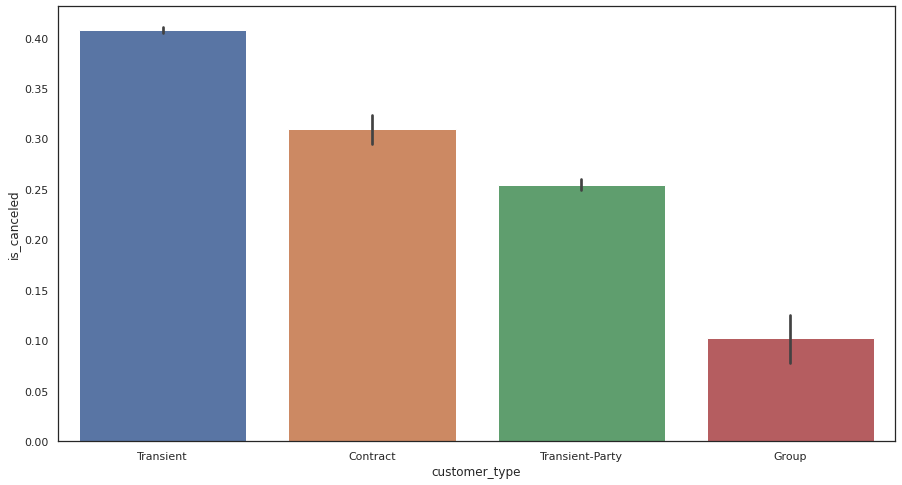

In [238]:
from numpy import mean
plt.figure(figsize = (15,8))
ax = sns.barplot(x="customer_type", y = "is_canceled", data=df, estimator=mean)

In [239]:
df.groupby('customer_type')['is_canceled'].mean()

customer_type
Contract           0.309617
Group              0.102253
Transient          0.407463
Transient-Party    0.254299
Name: is_canceled, dtype: float64

In [240]:
df.groupby('customer_type')['is_canceled'].count()

customer_type
Contract            4076
Group                577
Transient          89613
Transient-Party    25124
Name: is_canceled, dtype: int64

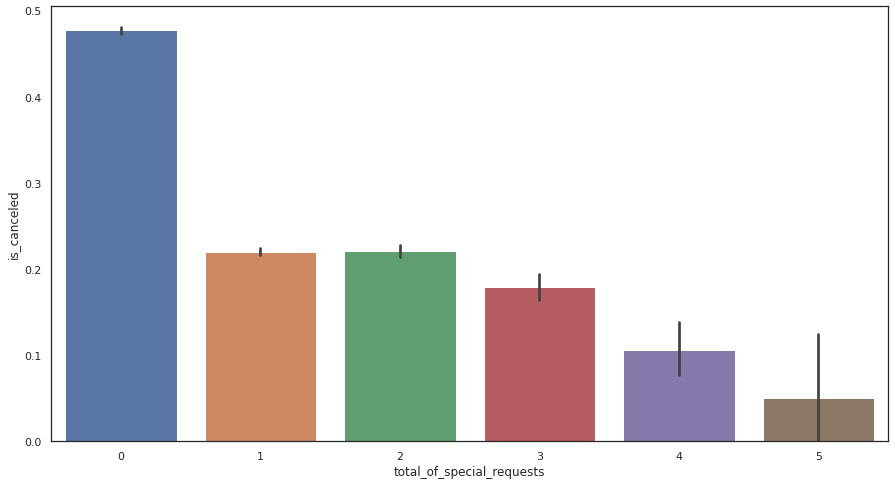

In [241]:
from numpy import mean
plt.figure(figsize = (15,8))
ax = sns.barplot(x="total_of_special_requests", y = "is_canceled", data=df, estimator=mean)

## Why I picked 'day_wait_rank'??

As we can see below the data volumn for all variables are same and there is variation is event capture rate. Hence I picked 'day_wait_rank'

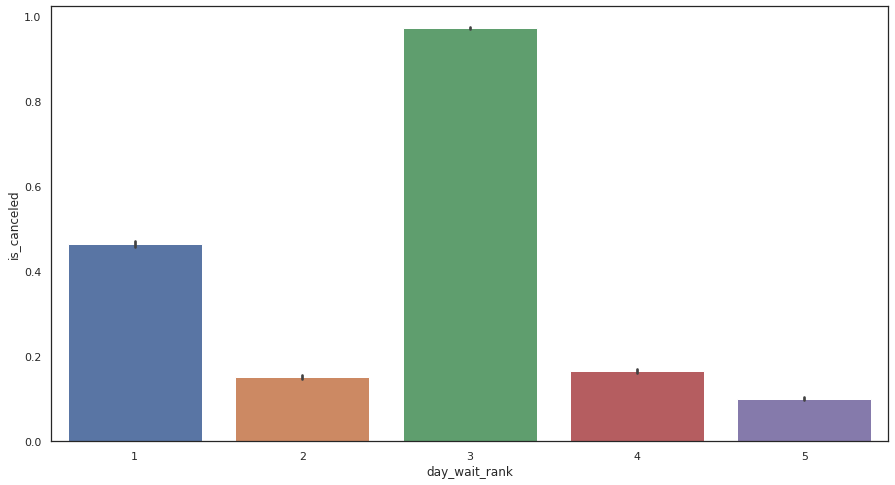

In [242]:
df['day_wait_rank'] = pd.qcut(df['days_in_waiting_list'].rank(method='first').values, 5, duplicates='drop').codes+1
# Sometimes min-max values are not clearly define so I reduce the rank from 10 to 5
from numpy import mean
plt.figure(figsize = (15,8))
a=sns.barplot(x="day_wait_rank", y="is_canceled", data=df, estimator=mean)

In [243]:
df.groupby('day_wait_rank')['is_canceled'].mean()

day_wait_rank
1    0.463774
2    0.151143
3    0.971396
4    0.166220
5    0.099548
Name: is_canceled, dtype: float64

In [244]:
df.groupby('day_wait_rank')['is_canceled'].count()

day_wait_rank
1    23878
2    23878
3    23878
4    23878
5    23878
Name: is_canceled, dtype: int64

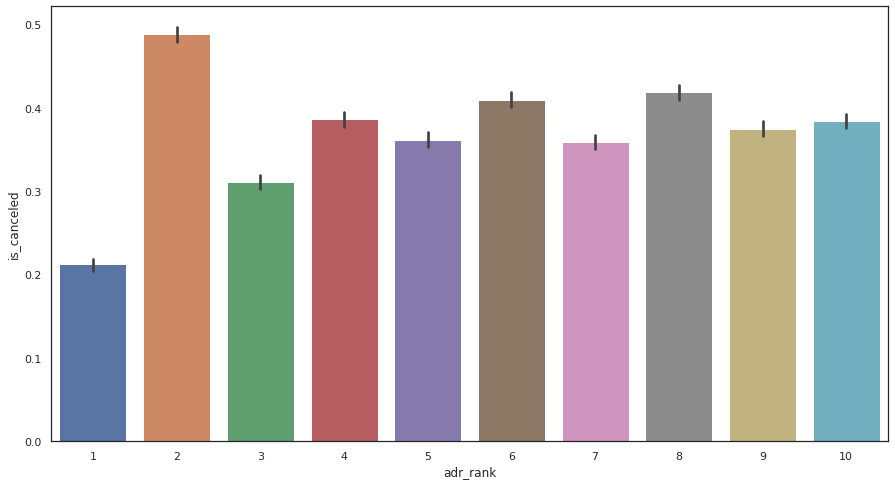

In [245]:
df['adr_rank'] = pd.qcut(df['adr'].rank(method='first').values, 10, duplicates='drop').codes+1

from numpy import mean
plt.figure(figsize = (15,8))
a=sns.barplot(x="adr_rank", y="is_canceled", data=df, estimator=mean)

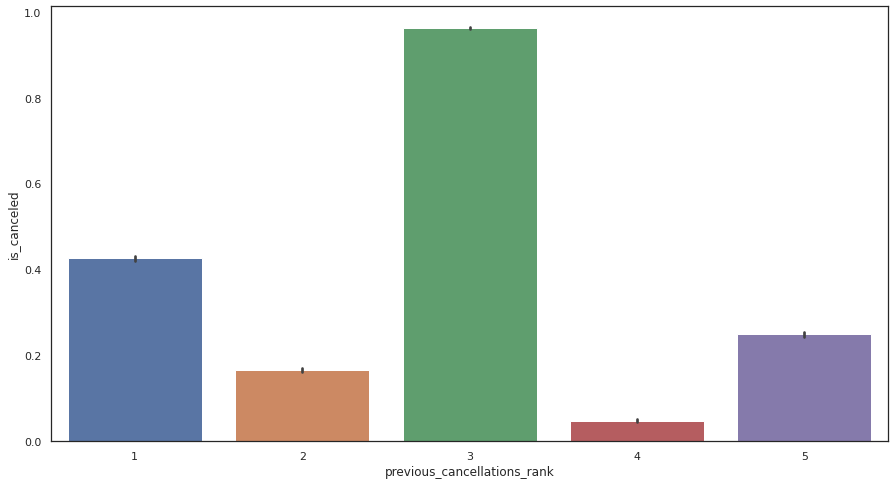

In [246]:
df['previous_cancellations_rank'] = pd.qcut(df['previous_cancellations'].rank(method='first').values, 5, duplicates='drop').codes+1

from numpy import mean
plt.figure(figsize = (15,8))
a=sns.barplot(x="previous_cancellations_rank", y="is_canceled", data=df, estimator=mean)

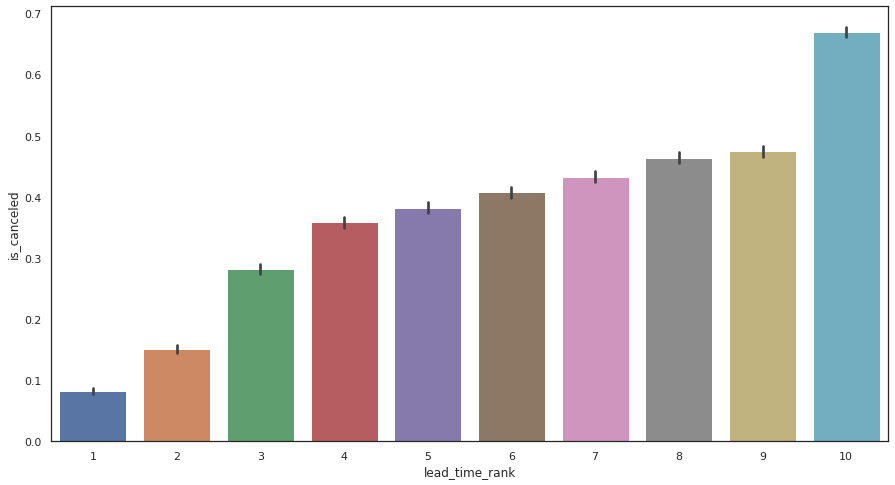

In [247]:
df['lead_time_rank'] = pd.qcut(df['lead_time'].rank(method='first').values, 10, duplicates='drop').codes+1

from numpy import mean
plt.figure(figsize = (15,8))
a=sns.barplot(x="lead_time_rank", y="is_canceled", data=df, estimator=mean)

In [272]:
#Below  features or feature combinations hint that the booking is likely to be cancelled

## Model preparation

In [248]:
dep=['is_canceled']
col_num = ['lead_time', 'adr'] #series of continous variables

col_char= ['day_wait_rank','total_of_special_requests', 'customer_type', 
           'reserved_room_type', 'distribution_channel', 'market_segment', 
           'stays_in_week_nights_rank', 'previous_cancellations'] #series of categorical variables

In [249]:
X_char_dum = pd.get_dummies(df[col_char], drop_first = True)

In [250]:
X_all = pd.concat([df[col_num], X_char_dum], axis=1, join='inner')

In [251]:
X_var=X_all
Y_var= df['is_canceled']

Logistic Regression: is the method to predict the target variable which is the probability of cancellation occurring.

Decision tree classifier: is the method that predicts the cancellation based on several input variables

Random forest classifier: It uses a decision tree built on the different sample and then caste vote for the cancellation prediction

In [252]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X_var, Y_var, test_size=0.3, random_state=0)
                                                    
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = 7, min_samples_leaf=5)
dtree.fit(X_train, y_train)

rf_1000 = RandomForestClassifier(n_estimators =1000,
                                 random_state = 2,
                                 criterion = 'gini',
                                 max_features = 'auto',
                                 max_depth = 7)

rf_1000.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


RandomForestClassifier(max_depth=7, n_estimators=1000, random_state=2)

In [253]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.79


In [254]:
y_pred_tree = dtree.predict(X_test)
print('Accuracy of Decision tree classifier on test set: {:.2f}'.format(dtree.score(X_test, y_test)))

Accuracy of Decision tree classifier on test set: 0.90


In [255]:
y_pred_RF = rf_1000.predict(X_test)
print('Accuracy of Random forest classifier on test set: {:.2f}'.format(rf_1000.score(X_test, y_test)))

Accuracy of Random forest classifier on test set: 0.89


In [273]:
# We can see that the accuracy rate of Decision tree and random forest classifier is very good

In [256]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[19589  2782]
 [ 4832  8614]]


In [257]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92     22371
           1       0.88      0.84      0.86     13446

    accuracy                           0.90     35817
   macro avg       0.90      0.89      0.89     35817
weighted avg       0.90      0.90      0.90     35817



<Figure size 1080x576 with 0 Axes>

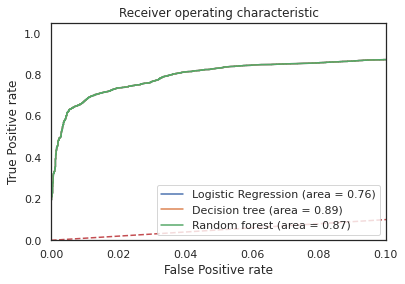

In [258]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
tree_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
RF_roc_auc = roc_auc_score(y_test, rf_1000.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, rf_1000.predict_proba(X_test)[:, 1])

plt.figure(figsize = (15,8))
plt.figure()

plt.plot(fpr, tpr, label ='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label ='Decision tree (area = %0.2f)' % tree_roc_auc)
plt.plot(fpr, tpr, label ='Random forest (area = %0.2f)' % RF_roc_auc)

plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 0.1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.savefig('Log_ROC')
plt.show()

## Above we can see the highly discriminating ROC curve

# Predictions from the models

I am using the model predicted probabilities and I have created 10 ranks out of these probabilities
10th  being the highest & 1st being the lowest.

Now what is meant by these 10 ranks?? 

Is that the people will recieve the number 10 are top 10% of these cancellation likelihood cases predicted by the model.

Now what I want to know is out of these 10 cases predicted by the model is in reality how many cancellation do I find?
So that it will tell me the probability of cancellation in that group. 

In [259]:
y_pred_prob = logreg.predict_proba(X_var)[:, 1]
df['y_pred_P'] = pd.DataFrame(y_pred_prob)
df['P_Rank'] = pd.qcut(df['y_pred_P'].rank(method='first').values, 10, duplicates = 'drop').codes+1
df.groupby('P_Rank')['is_canceled'].mean()
                    

P_Rank
1     0.051931
2     0.106290
3     0.116258
4     0.165424
5     0.218695
6     0.314432
7     0.448027
8     0.594606
9     0.744954
10    0.943546
Name: is_canceled, dtype: float64

In [260]:
y_pred_prob_dtree = dtree.predict_proba(X_var)[:, 1]
df['y_pred_P_dtree'] = pd.DataFrame(y_pred_prob_dtree)
df['P_Rank_dtree'] = pd.qcut(df['y_pred_P_dtree'].rank(method='first').values, 10, duplicates = 'drop').codes+1
df.groupby('P_Rank_dtree')['is_canceled'].mean()

P_Rank_dtree
1     0.001591
2     0.000084
3     0.008125
4     0.020437
5     0.069269
6     0.240807
7     0.605746
8     0.763464
9     0.996398
10    0.998241
Name: is_canceled, dtype: float64

In [261]:
y_pred_prob_rf = rf_1000.predict_proba(X_var)[:, 1]
df['y_pred_P_rf'] = pd.DataFrame(y_pred_prob_rf)
df['P_Rank_rf'] = pd.qcut(df['y_pred_P_rf'].rank(method='first').values, 10, duplicates = 'drop').codes+1
df.groupby('P_Rank_rf')['is_canceled'].mean()

P_Rank_rf
1     0.005947
2     0.004774
3     0.013318
4     0.041796
5     0.106290
6     0.253120
7     0.460173
8     0.838429
9     0.982662
10    0.997655
Name: is_canceled, dtype: float64

In [262]:
df.head()
df.to_csv('hotel_booking_score_file.csv') #new csv file generated

#Note: Identify as many events as possible by spending as less data observations as possible. It is the same as building a strategy to conduct as few experiments as possible but ensure maximum success at the same time

## How are the two hotels being booked throughout the year? Analyze the weekly or monthly data to provide insights and conclusions for the owner.

As we can see that the months like August, December and March see the higher non-cancellation booking spikes. It is obvious as well because in these months there are summer holidays, Christmas and winter holidays.

Hence customers already preplanned the booking for it so that later booking waiting can be avoided.

And if I compare the hotels then the City hotel is booked more in numbers than the resort hotel.

In [263]:
my_df =  pd.read_csv("hotel_booking.csv")
my_df = my_df[my_df['hotel']=='City Hotel']
my_df = my_df[my_df['is_canceled']==0]

f = pd.DataFrame(my_df, columns= ['arrival_date_month'])
ups_color = f.pivot_table(columns=['arrival_date_month'], aggfunc='size')
City_Hotel = ups_color.tolist()
City_Hotel

[4015, 5381, 2392, 3064, 2254, 4782, 4366, 4072, 4579, 2696, 4337, 4290]

In [264]:
my_df =  pd.read_csv("hotel_booking.csv")
my_df = my_df[my_df['hotel']=='Resort Hotel']
my_df = my_df[my_df['is_canceled']==0]

f = pd.DataFrame(my_df, columns= ['arrival_date_month'])
ups_color = f.pivot_table(columns=['arrival_date_month'], aggfunc='size')
Resort_Hotel = ups_color.tolist()
Resort_Hotel

[2550, 3257, 2017, 2308, 1868, 3137, 2038, 2573, 2535, 1976, 2577, 2102]

In [265]:
months = ['July', 'August', 'September', 'October', 'November', 'December', 'January', 'February', 'March', 'April', 'May', 'June' ] #as arranged in the data column


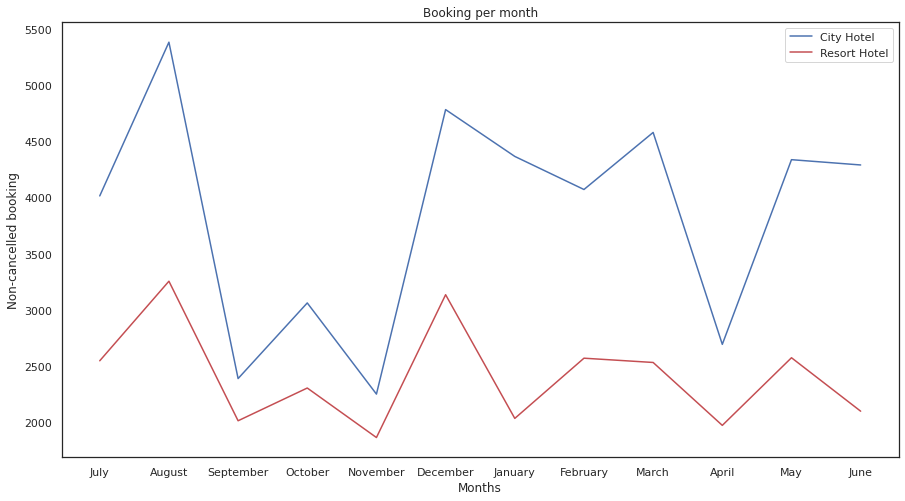

In [266]:
plt.figure(figsize = (15,8))
plt.plot(months, City_Hotel, color='b', label='City Hotel')
plt.plot(months, Resort_Hotel, color='r', label='Resort Hotel')
plt.xlabel("Months")
plt.ylabel("Non-cancelled booking")
plt.title("Booking per month")
plt.legend()
plt.show()

## How have the years affected the booking?

For the reservation status 

Checkout means the customer stayed in the hotel and didn't make the cancellation

Cancelled means the customer cancelled the booking

No-show means the customer didn't stay in the hotel but also didn't make the cancellation


I have added the checkout value and no-show value and subtracted it with the Canceled value to know which year was good for the hotel.

So for City hotel 2016 was a good year
Also for the resort hotel, 2016 was a good year.

But if I compare both the hotels the City hotel outperforms the resort hotel

In [267]:
df.groupby(['hotel', 'arrival_date_year'])['reservation_status'].agg(['value_counts'])

value_counts
hotel        arrival_date_year reservation_status              
City Hotel   2015              Check-Out                   7678
                               Canceled                    5882
                               No-Show                      122
             2016              Check-Out                  22733
                               Canceled                   14852
                               No-Show                      555
             2017              Check-Out                  15817
                               Canceled                   11452
                               No-Show                      239
Resort Hotel 2015              Check-Out                   6176
                               Canceled                    2069
                               No-Show                       69
             2016              Check-Out                  13637
                               Canceled                    4817
                               No-Show                      113
             2017              Check-Out                   9125
                               Canceled                    3945
                               No-Show                      109

## Identify customer groups and their characteristics. Explain your approach to the owner.

Transient: are the individual that book the hotel room for the same day 

Transient- party: are the group of people that book multiple hotel rooms 

Contract: an individual who books the hotel before his/her arrival with the signed contract

Group: a group who books the hotel rooms before the arrival(mostly they look for a resort)

From the tables below we can see that the Transient are among the highest customer group that make the booking as well as cancels the booking. As it can be justified because they make the booking on the same day so they probably call 4-5 hotel and then choose the one who is cheapest and offer a good deal.

My approach to avoid cancellation from the Transient would be to offer a discount if the hotel has a vacant room. Also, make sure to book the hotel for transients on a per night basis charges.

And use my model

In [268]:
df["customer_type"][df["is_canceled"] == 1].agg(["value_counts"])


,value_counts
Transient,36514
Transient-Party,6389
Contract,1262
Group,59


In [269]:
df["customer_type"][df["is_canceled"] == 0].agg(["value_counts"])

,value_counts
Transient,53099
Transient-Party,18735
Contract,2814
Group,518


## Characterize the most frequent cases of cancellation. Which properties do they share?

The cases of cancellation include:

1. Early booking

2. When a large group books a hotel via offline mode

3. Booking during high season

4. When guests don't have children to accompany

The property there share in general is the vacation season

## Based on reservation characteristics, make suggestions to the owner about pricing. Detect the cases when prices should be lowered or increased.

It is not mentioned why the customer who books room type 'P' has the highest chance of cancelling it. But as you can see from the below table it's kinda clear the doubt as room type 'P' is also amongst the least booked room. Therefore according to me maybe room P is costly which is why the customer cancelled the room when s(he) finds a cheap room in some other hotel.

I would suggest the owner to reduce the price of room P during the offseason when  there is no vacation and  increase the price when its the vacation month.

And also use my model to avoid cancellation



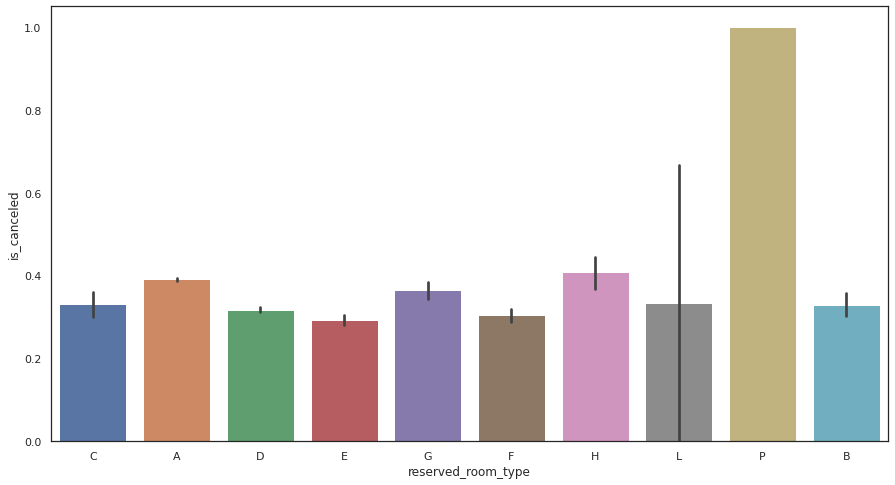

In [270]:
from numpy import mean
plt.figure(figsize = (15,8))
ax = sns.barplot(x="reserved_room_type", y = "is_canceled", data=df, estimator=mean)

In [271]:
df[df["reserved_room_type"] == df["assigned_room_type"]][["reserved_room_type", "assigned_room_type"]].agg(["value_counts"])

,reserved_room_type,assigned_room_type
,value_counts,value_counts
A,73598,73598
D,17736,17736
E,5923,5923
F,2707,2707
G,2041,2041
B,988,988
C,883,883
H,584,584
P,12,12


## What insights could you give to the hotel owner? How well are her hotels doing and is the business going up?

The city hotel booking peaks from May till June and October till September. While resort hotel remains consistent throughout the year.
Guests with kids have their booking during the summer break which is from July till August.

Hotel performance fluctuates as we can see from 2015 to 2017. 2016 was good and then 2017 performance went down.
I would suggest hotel owner use my Decision tree classifier or Random forest classifier model to early predict the cancellation and make the arrangements with the customer either by calling them or giving them a discount

In [274]:
#Thank you!